## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isna().sum()
# пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [4]:
# смотрим на уникальные значения каждого признака, чтобы определить тип признака
for elem in data:
    print(elem)
    print(data[elem].unique())

status
['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
duration
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
credit_history
['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
purpose
['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
amount
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  

status - порядковый   
duration - количественный   
credit_history - категориальный   
purpose - категориальный   
amount - количественный   
savings - порядковый   
employment_duration - порядковый   
installment_rate - порядковый   
personal_status_sex - категориальный   
other_debtors - категориальный   
present_residence - порядковый   
property - категориальный   
age - количественный   
other_installment_plans - категориальный   
housing - категориальный   
number_credits - порядковый   
job - категориальный   
people_liable - бинарный   
telephone - бинарный   
foreign_worker - бинарный   
credit_risk - бинарный

In [5]:
d = {'status': 'ordinal', 'duration': 'numerical', 'credit_history': 'categorical', 'purpose': 'categorical', 
     'amount': 'numerical', 'savings': 'ordinal', 'employment_duration': 'ordinal', 'installment_rate': 'ordinal', 
     'personal_status_sex': 'categorical', 'other_debtors': 'categorical', 'present_residence':'ordinal',
     'property': 'categorical', 'age': 'numerical', 'other_installment_plans': 'categorical', 'housing': 'categorical', 
     'number_credits': 'ordinal', 'job': 'categorical', 'people_liable': 'binar', 'telephone': 'binar', 
     'foreign_worker': 'binar', 'credit_risk': 'binar'}

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [247]:
len(data[(data['age'] < 30) & (data['housing'] == 'rent')])/len(data[(data['age'] < 30)]) * 100

66.66666666666666

In [248]:
len(data[(data['age'] > 40) & (data['housing'] == 'rent')])/len(data[(data['age'] > 40)]) * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [58]:
len(data[(data['foreign_worker'] == 'yes') & (data['number_credits'].apply(lambda x: x in ['4-5', '>=6']))])

1

### Задание 6 (1 балл)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

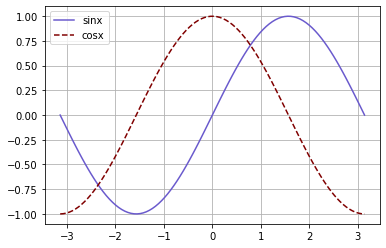

In [11]:
x = np.linspace(-pi, pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.grid(True)

plt.plot(x, y_sin, color='slateblue', label='sinx');
plt.plot(x, y_cos, color='maroon', linestyle = '--', label='cosx');
plt.legend();

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

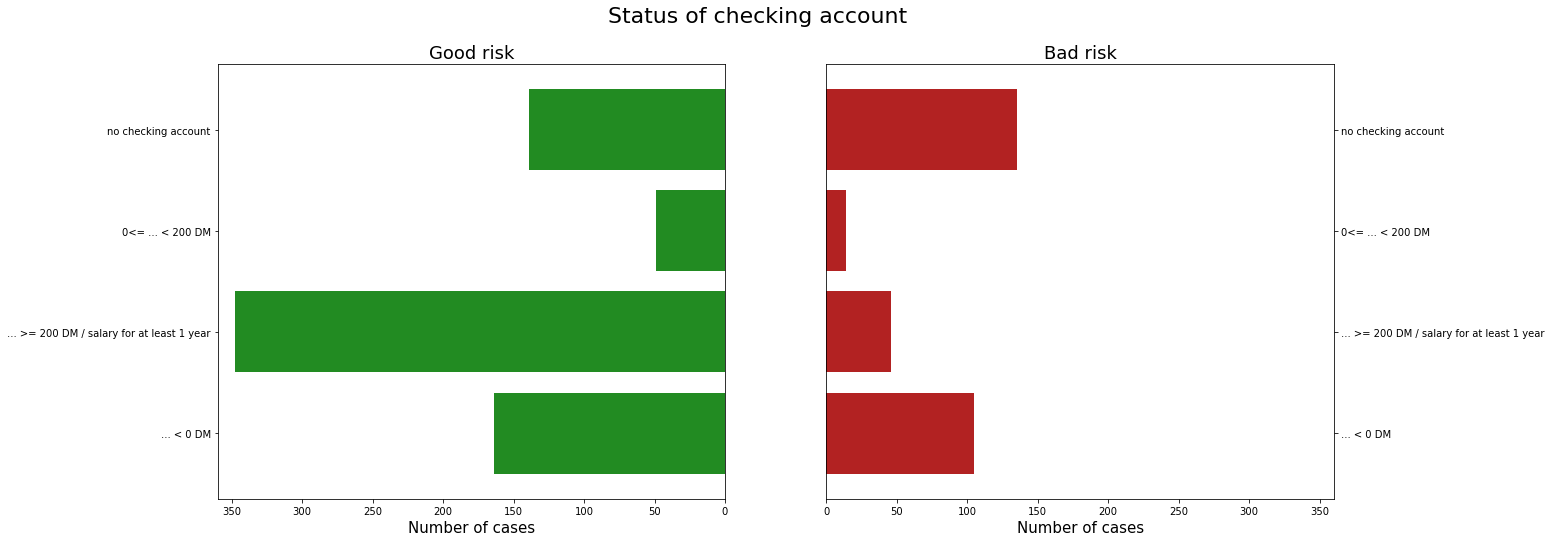

In [65]:
d1 = data.loc[data['credit_risk'] == 'good']
d2 = data.loc[data['credit_risk'] == 'bad']


fig, axis = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle('Status of checking account', size=22)

d1['status'].value_counts().sort_index().plot(ax=axis[0], kind='barh',width=0.8, color='forestgreen')
axis[0].set_title('Good risk', size=18)
axis[0].set_xlim([360, 0]) 
axis[0].set_xlabel('Number of cases', size=15)

d2['status'].value_counts().sort_index().plot(ax=axis[1], kind='barh', width=0.8, color='firebrick', title='Bad risk')
axis[1].set_title('Bad risk', size=18)
axis[1].set_xlim([0, 360])
axis[1].yaxis.tick_right()
axis[1].set_xlabel('Number of cases', size=15)

plt.show()
# видно, что в среднем больше good cases, причем >=200 DM значительно увеличивает вероятность выплаты кредита

### Задание 8  (0.5 балла)

In [13]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

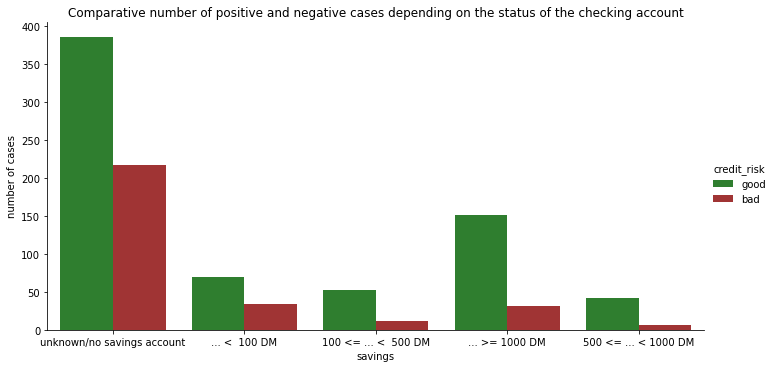

In [211]:
palette = ['forestgreen', 'firebrick']
sns.catplot(x='savings', hue='credit_risk', kind='count', aspect=2, palette=palette, data=data)
plt.title('Comparative number of positive and negative cases depending on the status of the checking account')
plt.xlabel('savings')
plt.ylabel('number of cases')
plt.show()
# больше всего отрицательных кейсов было среди клиентов без сберегательного счета, меньше всего - с 
# балансом от 100 до 1000 DM
# среди людей, имеющих сберегательные счета больше всего положительный кейсов было среди обладателей счета от 1000 DM

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

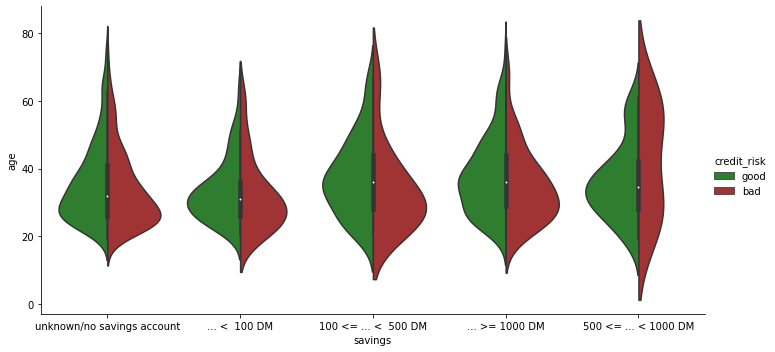

In [171]:
sns.catplot(x='savings', y="age", hue='credit_risk', kind="violin", aspect=2, 
            palette=palette, split=True, data=data)
plt.xlabel('savings')
plt.show()
# видим отсутствие пика в распределении по возрасту среди обладателей счето от 500 до 1000 DM c плохим кредитным риском

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

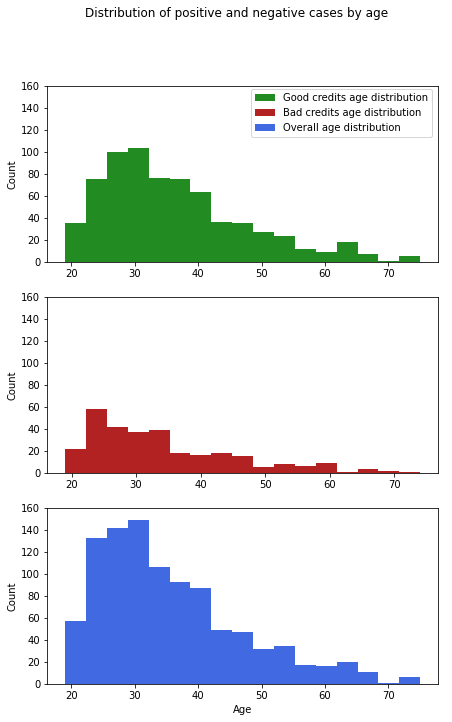

In [159]:
fig, axis = plt.subplots(3, 1, figsize=(7, 11))
fig.suptitle('Distribution of positive and negative cases by age')
axis[0].hist(x='age', bins=17, label='Good credits age distribution', color='forestgreen', data=d1)
axis[0].set_ylabel('Count')
axis[0].set_ylim((0, 160))
axis[1].hist(x='age', bins=17, label='Bad credits age distribution', color='firebrick', data=d2)
axis[1].set_ylabel('Count')
axis[1].set_ylim((0, 160))
axis[2].hist(x='age', bins=17, label='Overall age distribution', color='royalblue', data=data)
axis[2].set_ylabel('Count')
axis[2].set_xlabel('Age')
axis[2].set_ylim((0, 160))

fig.legend(loc = (0.555, 0.81));
# видно, что в целом отрицательных кейсов меньше, распределение по возрасту похоже вне зависимости от кредитного риска

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

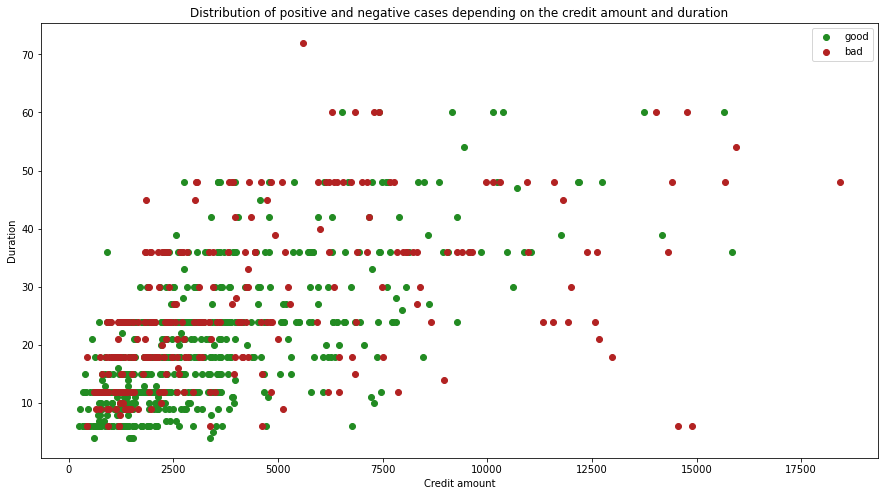

In [231]:
plt.figure(figsize=[15,8])
plt.title('Distribution of positive and negative cases depending on the credit amount and duration')
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.scatter(x=data[(data['credit_risk'] == 'good')]['amount'], y=data[(data['credit_risk'] == 'good')]['duration'], 
            c='forestgreen', label='good')
plt.scatter(x=data[(data['credit_risk'] == 'bad')]['amount'], y=data[(data['credit_risk'] == 'bad')]['duration'], 
            c='firebrick', label='bad')
plt.legend()
plt.show();
# кредиты с меньшей суммой и длительностью выплачиваются лучше

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

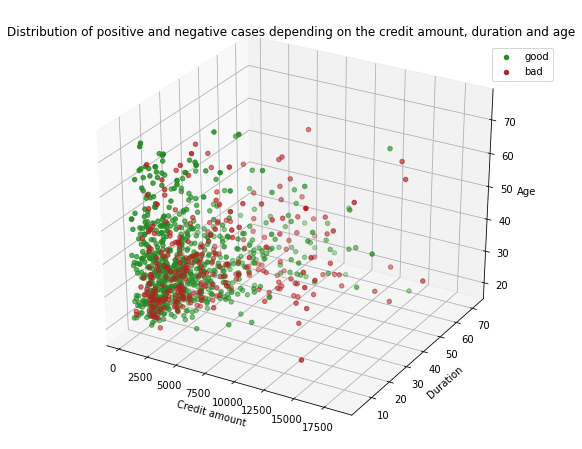

In [245]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[9,8])
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('Distribution of positive and negative cases depending on the credit amount, duration and age')
ax.set_xlabel("Credit amount") 
ax.set_ylabel("Duration") 
ax.set_zlabel("Age") 
ax.scatter(data[(data['credit_risk'] == 'good')]['amount'], data[(data['credit_risk'] == 'good')]['duration'], 
           data[(data['credit_risk'] == 'good')]['age'], c='forestgreen', label='good')
ax.scatter(data[(data['credit_risk'] == 'bad')]['amount'], data[(data['credit_risk'] == 'bad')]['duration'], 
           data[(data['credit_risk'] == 'bad')]['age'], c='firebrick', label='bad')
ax.legend(loc=(0.9, 0.83));

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [20]:
# one-hot для категориальных
data_encoded = pd.get_dummies(data, columns=[elem for elem in d if d[elem] == 'categorical'], drop_first=True)

In [21]:
# 1 или 0 для бинарных
for e in d:
    if d[e] == 'binar':
        data_encoded[e] = data_encoded[e].apply(lambda x: 1 if x == data_encoded[e].unique()[1] else 0)
data_encoded

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0,...,1,0,0,1,0,0,0,1,0,0
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,1,...,0,0,1,1,0,0,0,1,0,0
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0,...,0,0,1,1,0,0,0,0,0,1
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,1,...,0,0,1,1,0,0,0,0,0,1
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,>= 7 yrs,21,1,1,...,0,0,1,1,0,0,0,0,0,1
996,no checking account,24,2303,unknown/no savings account,>= 7 yrs,< 20,< 1 yr,45,1,0,...,0,0,1,1,0,0,1,1,0,0
997,... >= 200 DM / salary for at least 1 year,21,12680,... >= 1000 DM,>= 7 yrs,< 20,>= 7 yrs,30,1,0,...,0,1,0,1,0,1,0,0,0,0
998,... < 0 DM,12,6468,... >= 1000 DM,unemployed,25 <= ... < 35,< 1 yr,52,1,0,...,0,1,0,1,0,0,1,0,0,0


In [22]:
# находим порядковые признаки
for e in d:
    if d[e] == 'ordinal':
        print(e)

status
savings
employment_duration
installment_rate
present_residence
number_credits


In [23]:
# вручную пишем правильный порядок для числового представления

order_dict = {'status': ['no checking account', '... < 0 DM', '0<= ... < 200 DM', 
                         '... >= 200 DM / salary for at least 1 year' ], 
              'savings': ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM',
                          '500 <= ... < 1000 DM',  '... >= 1000 DM'], 
              'employment_duration': [ 'unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs','>= 7 yrs'], 
              'installment_rate': ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'],
              'present_residence': [ '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs' , '>= 7 yrs'],
              'number_credits': ['1', '2-3', '4-5', '>= 6']}


In [24]:
# представляем порядковые признаки в виде числовых значений
from sklearn.preprocessing import LabelEncoder
for e in d:
    if d[e] == 'ordinal':
        e_map = {label:idx for idx, label in enumerate(order_dict[e])}
        data_encoded[e]=data_encoded[e].map(e_map)
data_encoded

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,18,1049,0,1,0,3,21,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,1,...,0,0,1,1,0,0,0,1,0,0
2,1,12,841,1,3,2,3,23,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,...,0,0,1,1,0,0,0,0,0,1
4,0,12,2171,0,2,0,3,38,1,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,0,1,...,0,0,1,1,0,0,0,0,0,1
996,0,24,2303,0,4,0,0,45,0,0,...,0,0,1,1,0,0,1,1,0,0
997,3,21,12680,4,4,0,3,30,0,0,...,0,1,0,1,0,1,0,0,0,0
998,1,12,6468,4,0,2,0,52,0,0,...,0,1,0,1,0,0,1,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [32]:
# смотрим корреляцию всех признаков с credit_risk и указываем допустимую для нас корреляцию в 0.15 по модулю
cor_data = pd.DataFrame(data_encoded.corr(method ='pearson')['credit_risk'])
cor_data[abs(cor_data['credit_risk']) > 0.15]

,credit_risk
status,-0.350847
duration,0.214927
amount,0.154740
savings,-0.178943
credit_risk,1.000000


In [30]:
# в таблице с закодированными признаками оставляем только те, которые заметно коррелируют с возвратом кредита
data_encoded = data_encoded[cor_data[abs(cor_data['credit_risk']) > 0.15].index]
data_encoded

,status,duration,amount,savings,credit_risk
0,0,18,1049,0,0
1,0,9,2799,0,0
2,1,12,841,1,0
3,0,12,2122,0,0
4,0,12,2171,0,0
...,...,...,...,...,...
995,0,24,1987,0,1
996,0,24,2303,0,1
997,3,21,12680,4,1
998,1,12,6468,4,1


In [125]:
def predict(Xtest: np.array) -> np.array:
    x_rez = np.empty((len(Xtest), 1))
    for i in range(len(x)):
         x_rez[i] = np.round(-0.08*Xtest[i,0] + 0.015*Xtest[i,1] + 0.00002*Xtest[i,2] - 0.05*Xtest[i,3], 0)
    return x_rez

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data_encoded.drop('credit_risk', 1).values
y = data_encoded['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(accuracy_score(y_train, predict(X_train)))
print(accuracy_score(y_test, predict(X_test)))

0.7346666666666667
0.7
